In [1]:
from locus.models.dataset import LDoGIDataset
from locus.utils.paths import PROCESSED_DATA_DIR, PROJECT_ROOT

In [2]:
D = LDoGIDataset("quadtree.gml", from_id=1, to_id=1000, env=PROJECT_ROOT/".env")

In [3]:
# D[54, 78 ,2 ,14 ,65]

In [4]:
# Im = D[150][1][0]

In [5]:
# Im

In [6]:
import matplotlib.pyplot as plt
from random import randint
plt.imshow(D[4233899][1][0].permute(1, 2, 0))
plt.show()

IndexError: Index out of bounds 4233899

In [10]:
D[2][1][0].shape

torch.Size([3, 224, 224])

In [12]:
D[2][1][0].min()

tensor(0.0052)

In [7]:
from dotenv import dotenv_values
import psycopg2


config = dotenv_values("../.env")
conn = psycopg2.connect(
    host=config["DB_HOST"],
    port=config["DB_PORT"],
    dbname=config["DB_NAME"],
    user=config["DB_USER"],
    password=config["DB_PASSWORD"],
)
cur = conn.cursor()

In [11]:
import polars as pl
from locus.utils.paths import SQL_DIR

idx = [1]

sql_string = '''
select
    *
from
    dataset
where
id = 195370 and
    latitude >= 13.7548828125
    and latitude < 13.798828125
    and longitude >= 100.458984375
    and longitude < 100.546875;
'''
results_df = pl.read_database(sql_string, conn)
results_df

id,latitude,longitude,image
i64,f64,f64,object
195370,13.75806,100.458984,<memory at 0x7ffa623153c0>


In [ ]:
results_df[0] 

In [76]:
import torch
from torchvision.transforms import v2
t = v2.Compose(
    [
        v2.ToImage(),  # Convert to tensor, only needed if you had a PIL image
        v2.ToDtype(torch.uint8, scale=True),  # optional, most input are already uint8 at this point
        # ...
        v2.RandomResizedCrop(size=(360, 360), antialias=True),  # Or Resize(antialias=True)
        # ...
        # v2.ToDtype(torch.float32, scale=True),  # Normalize expects float input
        v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)


In [75]:
import polars as pl
from locus.utils.paths import SQL_DIR

idx = [1]

with open(SQL_DIR / "select_batch.sql", "r") as f:
    sql_string = f.read()

insert_string = "({})".format(", ".join((str(i) for i in idx)))
sql_string = sql_string.format(insert_string)
results_df = pl.read_database(sql_string, conn)

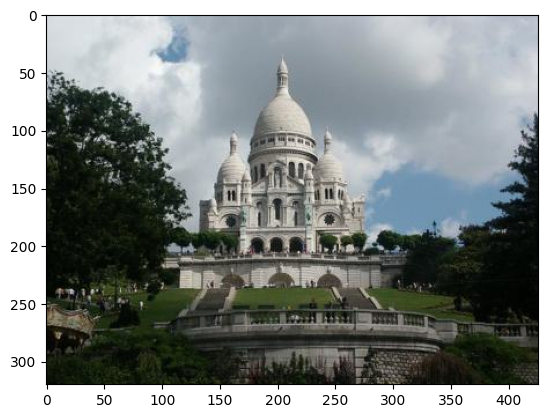

In [86]:
from io import BytesIO
from PIL import Image

idx = [150]

with open(SQL_DIR / "select_batch.sql", "r") as f:
    sql_string = f.read()

insert_string = "({})".format(", ".join((str(i) for i in idx)))
sql_string = sql_string.format(insert_string)
results_df = pl.read_database(sql_string, conn)
im_io = BytesIO(results_df["image"][0])
im_pil = Image.open(im_io)
import matplotlib.pyplot as plt
plt.imshow(im_pil)
plt.show()

In [63]:
import matplotlib.pyplot as plt
plt.imshow(Im.permute(1, 2, 0))
plt.show()